In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super(MNIST_CNN, self).__init__()
        # 4 Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        # 2 Dense Layers
        self.fc1 = nn.Linear(7*7*64, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(F.relu(self.conv4(x)), 2)
        x = x.view(-1, 7*7*64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# Hyperparameters
num_epochs = 5
batch_size = 64
learning_rate = 0.0005

# Setup device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the device
model = MNIST_CNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Using device: cuda


In [ ]:
# Data transform
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load training and test data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# To store loss values for plotting
loss_history = []

# Training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss
        loss_history.append(loss.item())

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print("Finished Training")

Epoch [1/5], Step [100/938], Loss: 0.2287
Epoch [1/5], Step [200/938], Loss: 0.1130
Epoch [1/5], Step [300/938], Loss: 0.2942
Epoch [1/5], Step [400/938], Loss: 0.0154
Epoch [1/5], Step [500/938], Loss: 0.0783
Epoch [1/5], Step [600/938], Loss: 0.0891
Epoch [1/5], Step [700/938], Loss: 0.0852
Epoch [1/5], Step [800/938], Loss: 0.0202
Epoch [1/5], Step [900/938], Loss: 0.1917
Epoch [2/5], Step [100/938], Loss: 0.0701
Epoch [2/5], Step [200/938], Loss: 0.0227
Epoch [2/5], Step [300/938], Loss: 0.1958
Epoch [2/5], Step [400/938], Loss: 0.0102
Epoch [2/5], Step [500/938], Loss: 0.0180
Epoch [2/5], Step [600/938], Loss: 0.0635
Epoch [2/5], Step [700/938], Loss: 0.0738
Epoch [2/5], Step [800/938], Loss: 0.0072
Epoch [2/5], Step [900/938], Loss: 0.0125
Epoch [3/5], Step [100/938], Loss: 0.0068
Epoch [3/5], Step [200/938], Loss: 0.0126
Epoch [3/5], Step [300/938], Loss: 0.0196
Epoch [3/5], Step [400/938], Loss: 0.0034
Epoch [3/5], Step [500/938], Loss: 0.0006
Epoch [3/5], Step [600/938], Loss:

In [ ]:
# Test the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc:.2f} %')

Accuracy of the network on the 10000 test images: 99.10 %


In [ ]:
# Save the model state dict
torch.save(model.state_dict(), "mnist_cnn.pth")
print("Model saved to mnist_cnn.pth")

Model saved to mnist_cnn.pth


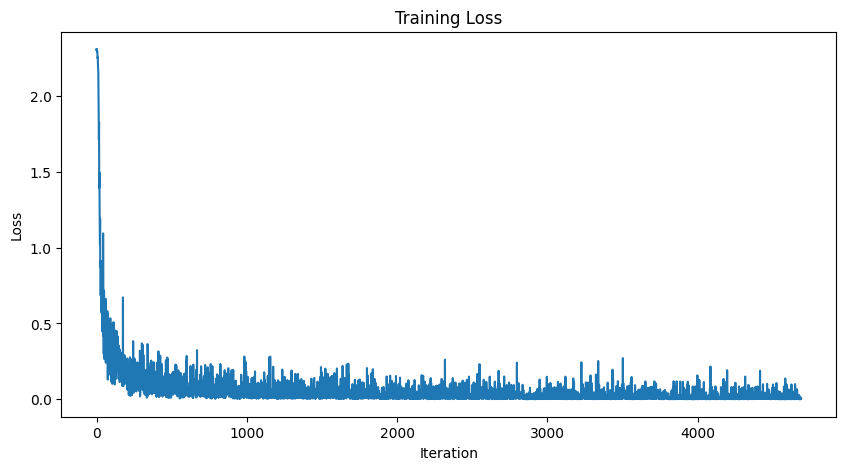

In [ ]:
# Plot the training loss
plt.figure(figsize=(10,5))
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()